In [124]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from math import sin
from math import cos
import pandas as pd
from scipy.optimize import curve_fit
from decimal import Decimal

In [390]:
def twoDRocket_ODE(state_vectors, t, g, m, IG, a, alpha, rho, S, Cl, Cd):
    # state_vectors = [x, y, V_x, V_y, theta, thetaDot]
    # t             = time vector (s)
    # g             = Gravitational Acceleration m/s^2
    # m             = Mass of the Rocket in kg
    # IG            = Moment of Inertia of the Rocket in kg*m^2
    # a             = Distance between the ceneter of pressure and center of gravity
    # alpha         = Angle of Attack
    # rho           = Air Density
    # S             = Relevant Area for Drag and Lift Force Calculation    
    # Cl            = Lift Coefficient
    # Cd            = Drag Coefficient    
    
    ####################################################
    
    ## Relevant Forces
    # T = Thrust from Motor in Newtons
    # v  = velocity in body frame or velocity magnitude m/s
    # L  = Lift in N (its direction is perpendicular to the veocity vector)
    # D  = Drag in N (its direction is parallel to the velocity vector)
    # Fx = Horizontal force acting on the rocket in body frame in N
    # Fy = Vertical force acting on the rocket in body frame in N
    T  = 0 # ADD THRUST EQUATION
    v  = math.sqrt(pow(state_vectors[2],2)+pow(state_vectors[3],2))
    L  = 0.5*rho*pow(v,2)*S*Cl
    D  = 0.5*rho*pow(v,2)*S*Cd 
    Fx = T + L*sin(alpha) - D*cos(alpha)
    Fy = L*cos(alpha) + D*sin(alpha)
    
    ####################################################
    
    ## ODE
    dxdt = state_vectors[2]
    dydt = state_vectors[3]
    dvxdt = (Fx*cos(state_vectors[4]) - Fy*sin(state_vectors[4]))/m
    dvydt = (Fx*sin(state_vectors[4]) + Fy*cos(state_vectors[4])-m*g)/m
    dthetadt = state_vectors[5]
    dthetaDotdt = (-L*a*cos(alpha) - D*a*sin(alpha))/IG
    return [dxdt, dydt, dvxdt, dvydt, dthetadt, dthetaDotdt]

In [392]:
## Define Parameters
# state_vectors = [x, y, V_x, V_y, theta, thetaDot]
# x0            = initial states
# tstep         = step size for time vector t in seconds
# t             = time vector (s)
# g             = Gravitational Acceleration m/s^2
# m             = Mass of the Rocket in kg
# IG            = Moment of Inertia of the Rocket in kg*m^2
# a             = Distance between the ceneter of pressure and center of gravity in m
# alpha         = Angle of Attack in radians
# rho           = Air Density in kg/m^3
# S             = Relevant Area for Drag and Lift Force Calculation in m^2  
# Cl            = Lift Coefficient
# Cd            = Drag Coefficient   

x0    = [0,0,0,0,0,0]
tstep = 0.0001 # s
t     = np.arange(0,10,tstep)
g     = 9.81 # m/s^2
# m     =
# IG    =
# a     =
alpha = 0
rho   = 1.225 # kg/m^3 at sea level Temporary value. Change it according to the day I launch it.
# S     =
Cl    = 0
# Cd    =
# solution = odeint(twoDRocket_ODE, x0, t, args = (g, m, IG, a, alpha, rho, S, Cl, Cd))
print(t)

[0.0000e+00 1.0000e-04 2.0000e-04 ... 9.9997e+00 9.9998e+00 9.9999e+00]


<Axes: title={'center': 'B6 Motor Thrust Curve by John Coker'}, xlabel='Time (s)', ylabel='Thrust (N)'>

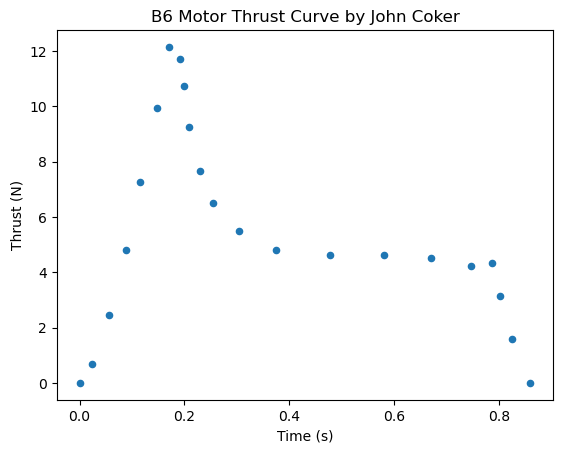

In [394]:
## Thrust Curve
ThrustData = pd.read_csv(r'C:\Users\bktf3\Desktop\rocket\simulation\B6motorThrustDatabyJohnCoker.csv', skiprows=3)
ThrustData.set_index('Time (s)')
ThrustData.plot.scatter(title = 'B6 Motor Thrust Curve by John Coker', x = 'Time (s)', y = 'Thrust (N)', xlabel = ('Time (s)'), ylabel = ('Thrust (N)')) 

C:\Users\bktf3\AppData\Local\Temp\ipykernel_4772\2881334060.py:10: OptimizeWarning: Covariance of the parameters could not be estimated
  constants       = curve_fit(linear, ThrustData[i:i+2,0], ThrustData[i:i+2,1])


Text(0, 0.5, 'Thrust (N)')

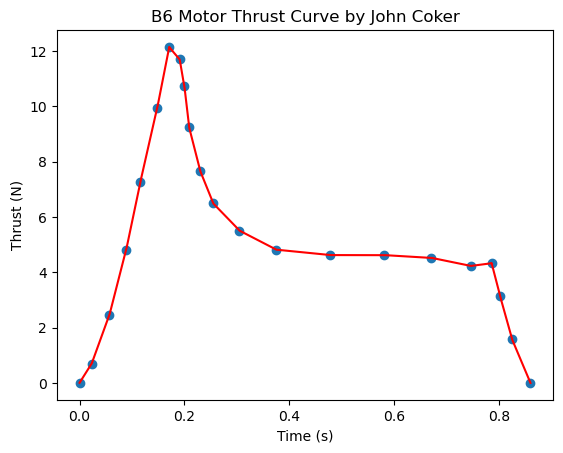

In [396]:
## Curve Fit Thrust Curve
ThrustData = pd.DataFrame(ThrustData).to_numpy()
fit = []
curvetime = []
# Type of curve I am going to be fitting for the thrust curve
def linear(x, a,b):
    return a*x + b  
for i in range(0,len(ThrustData)-1):
    timeForCurveFit = np.arange(ThrustData[i,0],ThrustData[i+1,0]+tstep,tstep)
    constants       = curve_fit(linear, ThrustData[i:i+2,0], ThrustData[i:i+2,1])
    a = constants[0][0]
    b = constants[0][1]
    for j in timeForCurveFit:
        fit.append(linear(j, a,b))
        curvetime.append(j)
fit = np.array(fit)
curvetime = np.array(curvetime)

plt.scatter(ThrustData[:,0],ThrustData[:,1])
plt.plot(curvetime,fit, color ='red')
plt.title('B6 Motor Thrust Curve by John Coker')
plt.xlabel('Time (s)')
plt.ylabel('Thrust (N)')